### Problem Statement

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

### Objective

1.Analyze month-wise sales trends.
2.Analyze year-wise sales trends.
3.Analyze yearly-month-wise sales trends.
4.Identify Top selling product

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

##### Reading the file

In [2]:
data = pd.read_csv(r'C:\Users\crisi\OneDrive\Desktop\mini\Amazon _Sales_data.csv')
# Retrieve the first 5 rows
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


#### PreProcessing

In [3]:
# Checking the shape of data
data.shape

(100, 14)

In [4]:
# Checking the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
##### Convertion of date into actual format

# Order Date

# Define the formats to attempt
formats = ['%m/%d/%Y', '%m-%d-%Y']

# Initialize an empty list to store converted dates
converted_orderdates = []

# Iterate through each date string
for orderdate_str in data['Order Date']:
    converted_orderdate = None
    for fmt in formats:
        try:
            converted_orderdate = pd.to_datetime(orderdate_str, format=fmt)
            break  # If successful, break out of the loop
        except ValueError:
            pass  # If ValueError, continue to next format
    if converted_orderdate is not None:
        converted_orderdates.append(converted_orderdate)
    else :
        converted_orderdates.append(pd.NaT)

# Assign the converted dates back to the DataFrame
data['Order Date'] =converted_orderdates
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
# Ship Date
# Define the formats to attempt
formats = ['%m/%d/%Y', '%m-%d-%Y']

# Initialize an empty list to store converted dates
converted_shipdates = []

# Iterate through each date string
for shipdate_str in data['Ship Date']:
    converted_shipdate = None
    for fmt in formats:
        try:
            converted_shipdate = pd.to_datetime(shipdate_str, format=fmt)
            break  # If successful, break out of the loop
        except ValueError:
            pass  # If ValueError, continue to next format
    if converted_shipdate is not None:
        converted_shipdates.append(converted_shipdate)
    else :
        converted_shipdates.append(pd.NaT)

# Assign the converted dates back to the DataFrame
data['Ship Date'] =converted_shipdates
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
# For a single column
unique_count = data['Order Date'].nunique()
print(f"Number of unique values: {unique_count}")
unique_count = data['Ship Date'].nunique()
print(f"Number of unique values: {unique_count}")

# For all columns
unique_counts = data.nunique()
print(unique_counts)


Number of unique values: 100
Number of unique values: 99
Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order Date        100
Order ID          100
Ship Date          99
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64


In [8]:
# Checkimg the missing values 
missing_values = data.isnull().sum()

print("Missing Values of all columns")
print(missing_values)

Missing Values of all columns
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


#### Extracting 'Year' and 'Month' from 'Order Date'

In [9]:
# Extract the year from the 'Order Date' column and create a new 'Year' column
data['Year'] = data['Order Date'].dt.year

# Extract the month from the 'Order Date' column and create a new 'Month' column
data['Month'] = data['Order Date'].dt.month

# Display the first few rows of the dataframe to verify the new columns
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [10]:
# convertion of date time into actual fromat
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.date
data['Ship Date'] = pd.to_datetime(data['Ship Date']).dt.date

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


#### Convert numerical columns to appropriate data types

In [11]:
# Convertion of numerical column into list:
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric)

#### Extract and Transform Specific Information

In [12]:
# Calculate shipping duration in days
data['Shipping Duration']=(data['Ship Date'] - data['Order Date'])

data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Shipping Duration
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,"30 days, 0:00:00"
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,"24 days, 0:00:00"
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,"6 days, 0:00:00"
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,"15 days, 0:00:00"
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,"5 days, 0:00:00"


### Analysis

#### Calculating total sales by region

In [13]:
# Finding total sales by groupby function
total_sales_by_region = data.groupby('Region')['Total Revenue'].sum()
print("Total Sales by Region:")
print(total_sales_by_region)

Total Sales by Region:
Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64


#### Calculating total sales by region

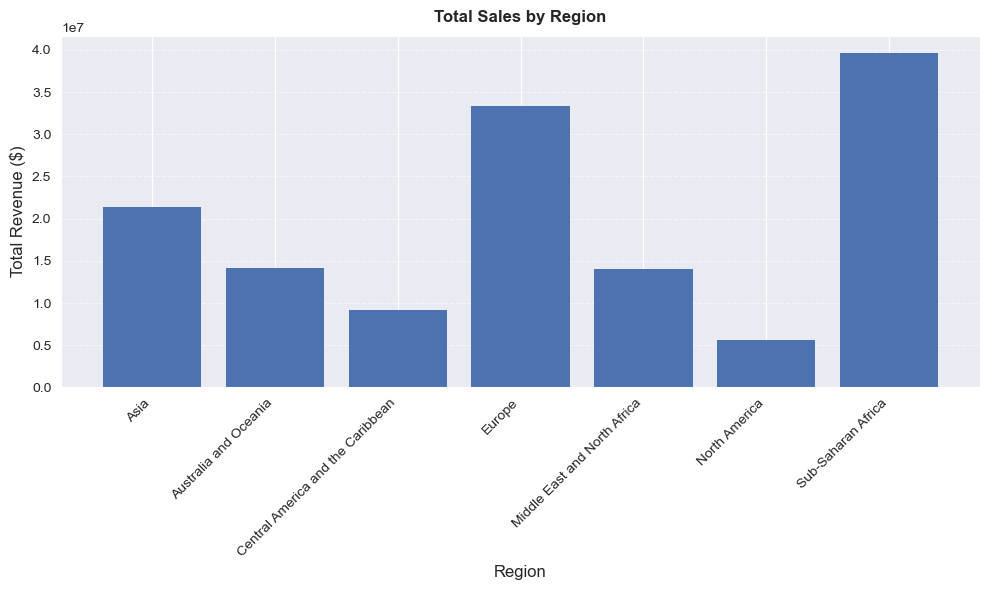

In [14]:
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(total_sales_by_region.index, total_sales_by_region.values, color='#4C72B0', edgecolor='none')

# Adding title and labels
plt.title('Total Sales by Region', fontsize=12, fontweight='bold', pad=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Customize the x-ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Improve layout
plt.tight_layout()

plt.show()


#### Calculate total profit by region

In [15]:
# calculating total profit by group by function:
total_profit_by_region = data.groupby('Region')['Total Profit'].sum().reset_index()
print("Total Profit by Region:")
print(total_profit_by_region)

Total Profit by Region:
                              Region  Total Profit
0                               Asia    6113845.87
1              Australia and Oceania    4722160.03
2  Central America and the Caribbean    2846907.85
3                             Europe   11082938.63
4       Middle East and North Africa    5761191.86
5                      North America    1457942.76
6                 Sub-Saharan Africa   12183211.40


#### Visualizing Calculate total profit by region

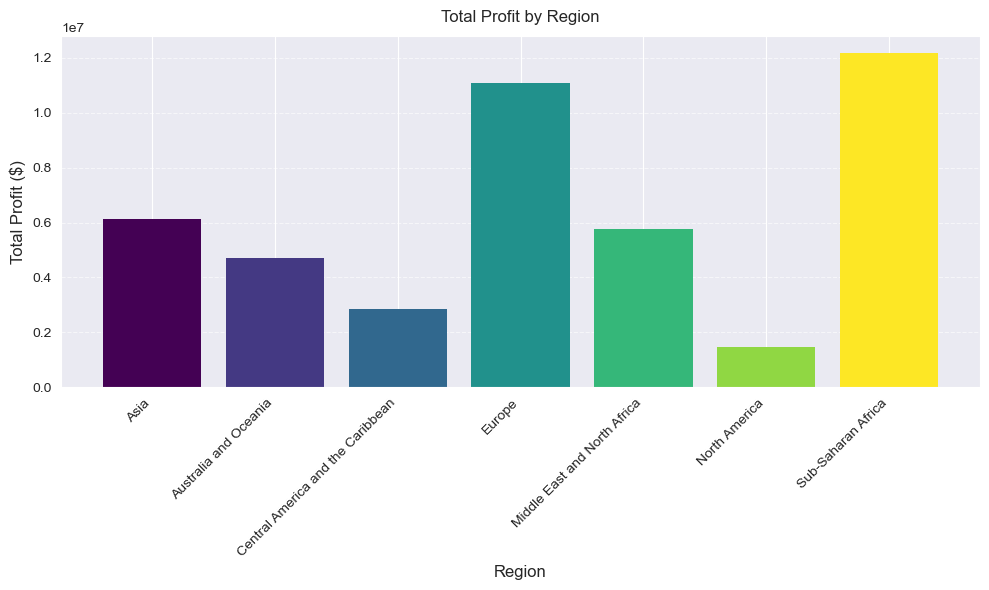

In [16]:
plt.figure(figsize=(10, 6))

# Apply the colormap
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(total_profit_by_region)))

# Create the bar plot with colormap
plt.bar(total_profit_by_region['Region'], total_profit_by_region['Total Profit'], color=colors, edgecolor='none')

# Adding title and labels
plt.title('Total Profit by Region', fontsize=12, pad=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Customize the x-ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Improve layout
plt.tight_layout()

plt.show()

#### Calculating top-selling products by total units sold

In [17]:
# calculating Top Selling ptoduct usinf groupby,sum and sort function:

top_selling_products = data.groupby('Item Type')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)
print("Top-Selling Products:")
print(top_selling_products)

Top-Selling Products:
          Item Type  Units Sold
4         Cosmetics       83718
3           Clothes       71260
1         Beverages       56708
5            Fruits       49998
9     Personal Care       48708
8   Office Supplies       46967
6         Household       44727
0         Baby Food       40545
2            Cereal       25877
11       Vegetables       20051
10           Snacks       13637
7              Meat       10675


#### Visualizing the Top-Selling Product

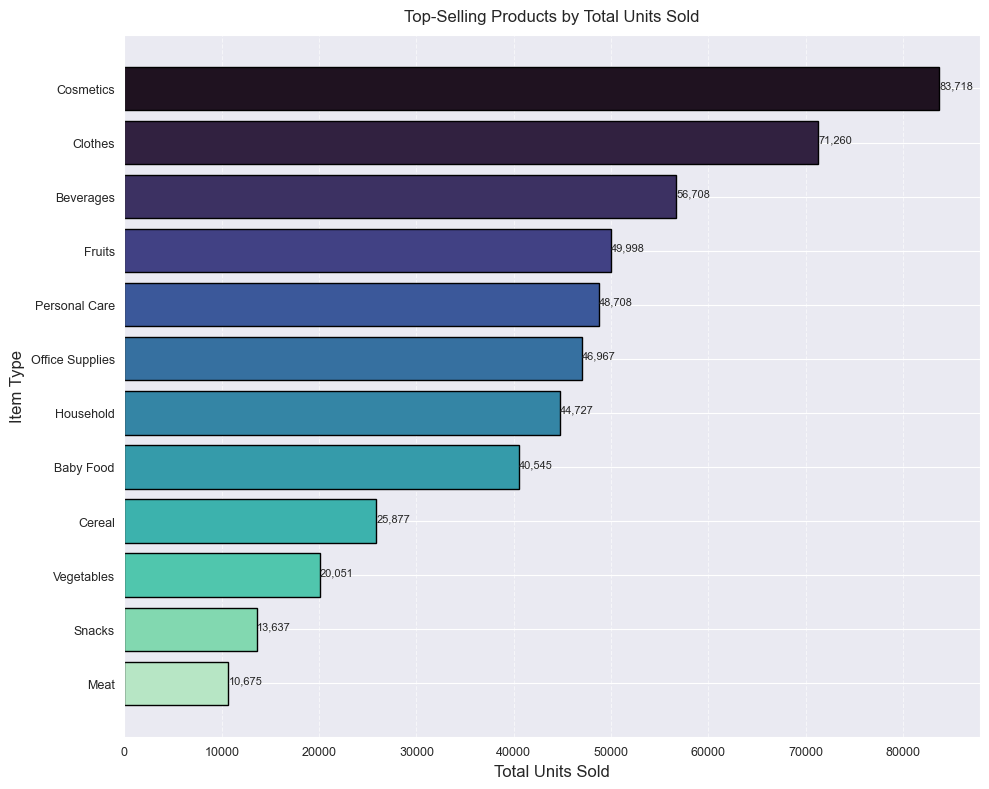

In [18]:
# Retrieving the top selling product
top_selling_products = top_selling_products.sort_values(by='Units Sold', ascending=True)
plt.figure(figsize=(10, 8))


colors = sns.color_palette("mako", len(top_selling_products))
colors = colors[::-1]  # Reverse the color palette

# Create horizontal bar plot
bars = plt.barh(top_selling_products['Item Type'], top_selling_products['Units Sold'], color=colors, edgecolor='black')

# Adding title and labels
plt.title('Top-Selling Products by Total Units Sold', fontsize=12, pad=10)
plt.xlabel('Total Units Sold', fontsize=12)
plt.ylabel('Item Type', fontsize=12)

# Adding grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Customize the x-ticks and y-ticks
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Annotate bars with the value
for index, value in enumerate(top_selling_products['Units Sold']):
    plt.text(value,index, f'{value:,.0f}',ha="left", fontsize=8)
    
# Improve layout
plt.tight_layout()

plt.show()

#### Month-wise Sales Trend

In [19]:
# Computing month-wise-sales 
month_wise_sales = data.groupby('Month')['Total Revenue'].sum().reset_index()
print("Month-wise Sales Trend:")
print(month_wise_sales)

Month-wise Sales Trend:
    Month  Total Revenue
0       1    10482467.12
1       2    24740517.77
2       3     2274823.87
3       4    16187186.33
4       5    13215739.99
5       6     5230325.77
6       7    15669518.50
7       8     1128164.91
8       9     5314762.56
9      10    15287576.61
10     11    20568222.76
11     12     7249462.12


#### Visualizing the Month-wise Sales Trend

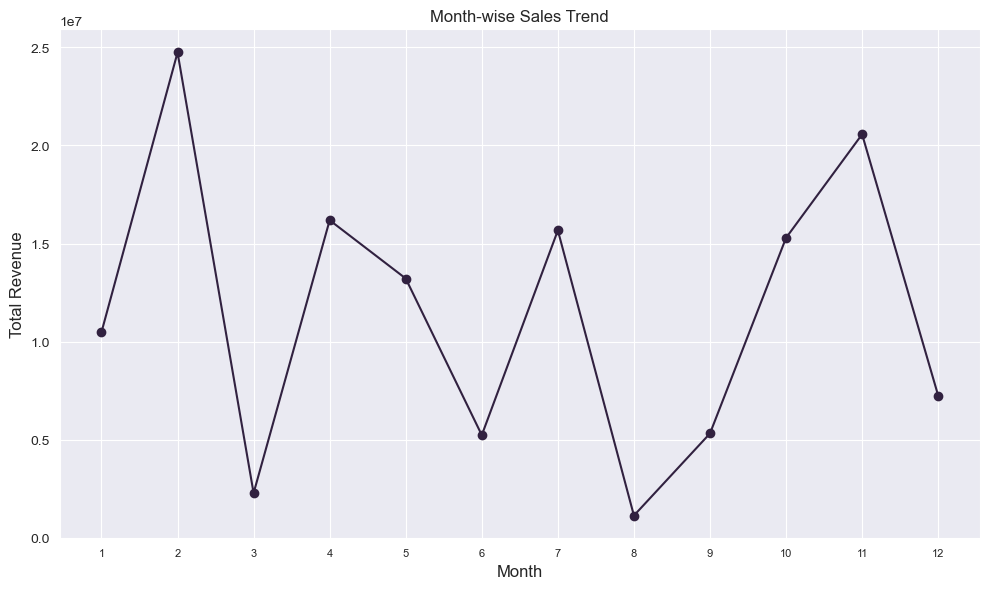

In [20]:
plt.figure(figsize=(10, 6))

# Use a single color from the palette or define your color directly
color = sns.color_palette("mako", len(month_wise_sales))[1]

# Create the line plot
plt.plot(month_wise_sales['Month'], month_wise_sales['Total Revenue'], marker='o', color=color)

# Adding title and labels
plt.title('Month-wise Sales Trend', fontsize=12, )
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Customize the x-ticks (assuming your months are in a 1-12 range)
plt.xticks(range(1, 13), fontsize=8)

plt.tight_layout()
plt.show()


#### Year-wise Sales Trend

In [23]:
# Computing the Year-wise sales 
year_wise_sales = data.groupby('Year')['Total Revenue'].sum().reset_index()
print("Year-wise Sales Trend:")
print(year_wise_sales)

Year-wise Sales Trend:
   Year  Total Revenue
0  2010    19186024.92
1  2011    11129166.07
2  2012    31898644.52
3  2013    20330448.66
4  2014    16630214.43
5  2015    12427982.86
6  2016    12372867.22
7  2017    13373419.63


#### Visulaizing the year-wise Sales Trend

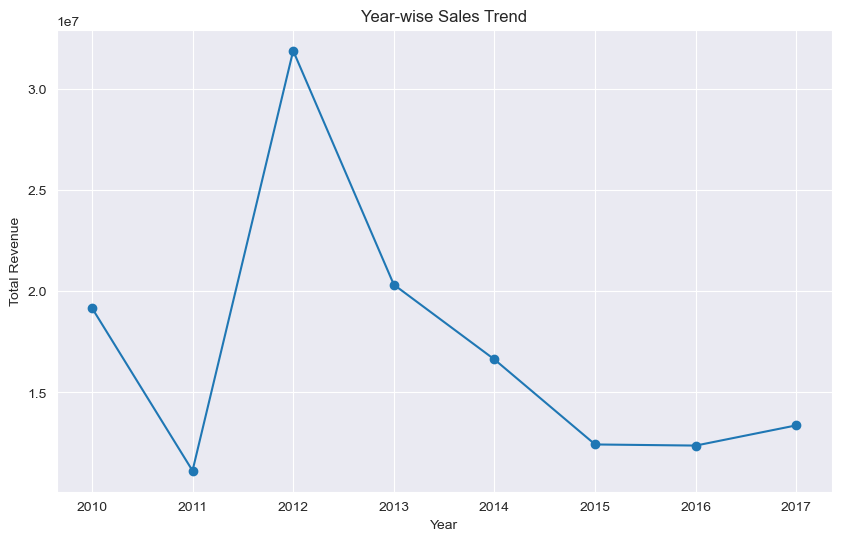

In [24]:
plt.figure(figsize=(10, 6))

# Plot the 'Year' on the x-axis and 'Total Revenue' on the y-axis
plt.plot(year_wise_sales['Year'], year_wise_sales['Total Revenue'], marker='o')

# Add a title to the plot for clarity
plt.title('Year-wise Sales Trend')

# labeling X & Y axis
plt.xlabel('Year')
plt.ylabel('Total Revenue')

# Add a grid to the plot for better readability of the data points
plt.grid(True)

# Set custom x-tick labels using the 'Year' values, ensuring they match the data
plt.xticks(year_wise_sales['Year'])

# Display the plot
plt.show()

#### Yearly Month-wise Sales Trend

In [25]:
# Computing the Yearly Month-wise Sales Trend
yearly_month_wise_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
print("Yearly Month-wise Sales Trend:")
print(yearly_month_wise_sales)


Yearly Month-wise Sales Trend:
    Year  Month  Total Revenue
0   2010      2     3410661.12
1   2010      5     2587973.26
2   2010      6     1082418.40
3   2010     10     6064933.75
4   2010     11     3458252.00
5   2010     12     2581786.39
6   2011      1     1042225.35
7   2011      2      387002.20
8   2011      4     2798046.49
9   2011      5      272410.45
10  2011      6       19103.44
11  2011      7       97040.64
12  2011      9      574951.92
13  2011     11     5938385.58
14  2012      1     1012884.00
15  2012      2     6707849.42
16  2012      3      994765.42
17  2012      4     4556012.38
18  2012      5     3782781.82
19  2012      6     2132075.27
20  2012      7     4445093.92
21  2012      8      576782.80
22  2012      9     4648152.72
23  2012     10     3042246.77
24  2013      2     3296425.02
25  2013      3      835759.10
26  2013      4     3262562.10
27  2013      6     1352867.40
28  2013      7     8545511.20
29  2013      8       89623.98
30  2013

##  Visualizing Yearly Month-wise Sales Trend

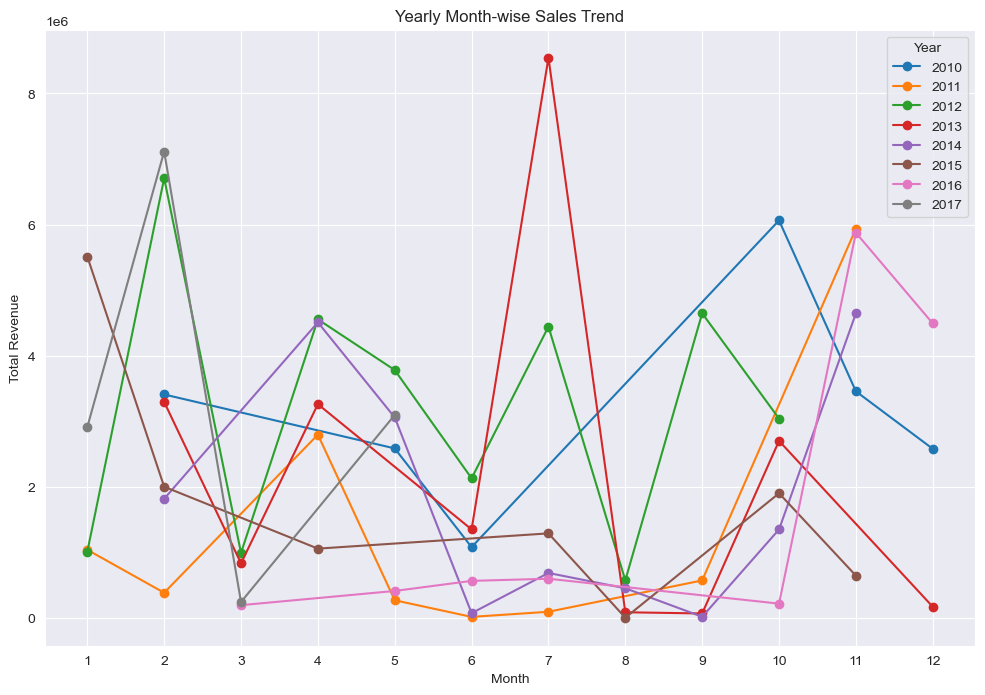

In [26]:
plt.figure(figsize=(12, 8))

# Iterate through each unique year in the 'Year' column
for year in yearly_month_wise_sales['Year'].unique():
    subset = yearly_month_wise_sales[yearly_month_wise_sales['Year'] == year]
    plt.plot(subset['Month'], subset['Total Revenue'], marker='o', label=str(year))

# Set the title 
plt.title('Yearly Month-wise Sales Trend')

# Label the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Add a legend 
plt.legend(title='Year')

# Enable the grid on the plot for better readability of the data points
plt.grid(True)
plt.xticks(range(1, 13))

# Display the plot with all the added features and settings
plt.show()

### Modeling

In [31]:
from sklearn.linear_model import LinearRegression

year_wise_sales['Year'] = np.arange(len(year_wise_sales))

# Define the feature and target
X = year_wise_sales[['Year']].values
y = year_wise_sales['Total Revenue'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Forecast for future years
future_years = np.arange(len(year_wise_sales), len(year_wise_sales) + 5).reshape(-1, 1)
forecast = model.predict(future_years)

# Round forecast values to the nearest integer
forecast = np.round(forecast).astype(int)

# Prepare forecast DataFrame
forecast_df = pd.DataFrame({
    'Year': np.arange(year_wise_sales['Year'].max() + 1, year_wise_sales['Year'].max() + 6),
    'Forecast': forecast
})

# Print the forecast DataFrame
print("Linear Regression Forecast:")
print(forecast_df)

Linear Regression Forecast:
   Year  Forecast
0     8  11994563
1     9  10844778
2    10   9694993
3    11   8545208
4    12   7395422


### Visualizing model

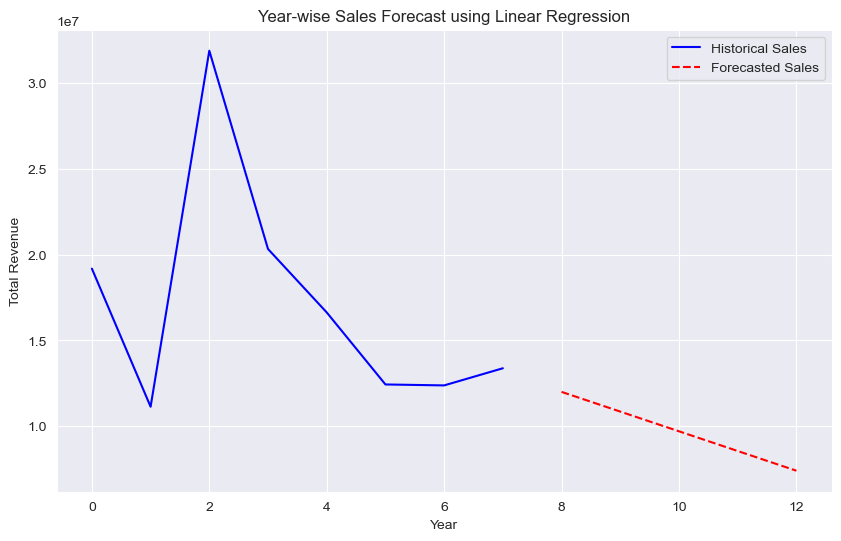

In [32]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(year_wise_sales['Year'], year_wise_sales['Total Revenue'], label='Historical Sales', color='blue')

# Plot forecasted data
plt.plot(forecast_df['Year'], forecast_df['Forecast'], label='Forecasted Sales', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Year-wise Sales Forecast using Linear Regression')
plt.legend()

plt.show()

### Inference From the Dataset

# Sales Performance Analysis and Recommendations

### 1. Regional Sales Performance
- **Highest Revenue Regions**: Europe, Asia, Australia, and Oceania generate the highest total revenue, indicating strong sales performance in these areas.
- **Emerging Markets**: Sub-Saharan Africa demonstrates notable sales with a diverse range of item types, suggesting it as a growing market with potential.

### 2. Item Type Trends
- **Top Items by Revenue**: Baby Food, Office Supplies, and Cosmetics lead in revenue, with Baby Food and Office Supplies consistently popular across various regions.
- **High Volume Sales**: Fruits and Vegetables, despite lower unit prices, show high units sold. This suggests high-volume, low-margin sales that drive considerable traffic but yield lower profit margins.

### 3. Sales Channel Effectiveness
- **Offline vs. Online Sales**: Online sales channels generate higher total revenue than offline channels, suggesting a shift towards e-commerce with potential for greater profitability.

### 4. Order Priority Impact
- **High Priority Orders**: Orders marked as high priority ('H') show higher revenue and profit, indicating that urgent orders may be more valuable and potentially more profitable.

### 5. Seasonal Trends
- **Month-wise Trends**: Certain months, notably November and February, show increased sales volumes and revenue. December’s high sales may be driven by holiday shopping patterns.

### 6. Shipping Duration
- **Impact on Sales**: Shipping durations vary widely, from 1 day to over 45 days. Shorter shipping times are generally linked to higher revenue and profit, emphasizing the importance of efficient logistics.

### 7. Country-Specific Insights
- **High Revenue Countries**: Australia, the UK, and the US are significant revenue contributors. Meanwhile, smaller countries in Sub-Saharan Africa, though contributing less, exhibit growth potential.

### 8. Yearly Insights
- **Revenue Trends**: Total revenue peaked in 2012 at $31.9 million, followed by a decline and a slight recovery by 2017. This suggests 2012 was a peak year, after which the market faced challenges or shifts affecting revenue.

---

## Recommendations

- **Expand Online Presence**: With online sales outperforming offline, investing in digital marketing and enhancing the online shopping experience can be highly beneficial.

- **Optimize Shipping**: Reducing shipping times where possible could improve customer satisfaction and boost sales and profit margins.

- **Focus on High-Performance Regions**: Prioritize product expansion and personalized customer support in high-revenue regions like Europe, Australia, and Asia.

- **Monitor Item Performance**: Regularly assess item performance to adjust inventory and marketing strategies, focusing on high-revenue and high-volume products for targeted growth.
